<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/graph_metods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теория Граф. Методов


ПЗ-1

In [2]:
import re
import numpy as np
import networkx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import math
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


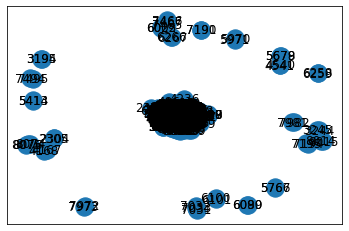

In [0]:

f = open('/content/drive/My Drive/Colab Notebooks/graph_metods/Wiki-Vote.txt')
l=f.read()
p=re.findall("(\d{1,}\t\d{1,})",l)
ne=re.findall("(Nodes: \d{1,}|Edges: \d{1,})",l)
nodes = float(re.findall('\d{1,}', ne[0])[0])
edges = float(re.findall('\d{1,}', ne[1])[0])

p = [i.split('\t') for i in p]
p=[[int(i[0]), int(i[1])] for i in p]
#print('Пороговое значение: ',np.log(nodes)/(nodes-1))
#print('Текущее значение: ', edges/(nodes*(nodes-1)))
#print('Текущее значение для слабых: ', 2*edges/(nodes))
#print(max(p))
#print(n[:100])

g=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/Wiki-Vote.txt', comments='#', delimiter='\t')
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()                        

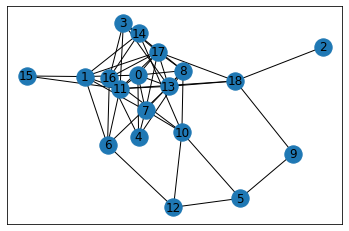


0.16357994328702447
0.7719298245614036
0.3859649122807018
 
0.16357994328702447
0.7573099415204678
1.5146198830409356


In [0]:

gr = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/graph_metods/Дружба.xlsx')
graph=gr.values[:-1,:-1]
connectivity_list = []
for i in range(graph.shape[0]):
    for j in range(graph.shape[1]):
        if graph[i,j]==1:
            connectivity_list.append([i,j])
# handle = open(r'E:\TGP_ShIva\connectivity_list_friendship.txt', 'w')
# for i in connectivity_list:
#     handle.write(str(i[0]) + ' ' + str(i[1])+'\n')
# handle.close()
avg_pow=sum(sum(graph))/19
g=networkx.read_edgelist('/content/drive/My Drive/Colab Notebooks/graph_metods/connectivity_list_dr.txt', comments='#', delimiter=' ')
networkx.drawing.nx_pylab.draw_networkx(g)
plt.show()  
print(g)
print(math.log(19)/18)
print(avg_pow/18)
print(avg_pow/36)
print(' ')

gr = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/graph_metods/Дни рождения.xlsx')
graph=gr.values[:-1,:-1]
connectivity_list = []
for i in range(graph.shape[0]):
    for j in range(graph.shape[1]):
        if graph[i,j]==1:
            connectivity_list.append([i,j])
# handle = open(r'E:\TGP_ShIva\connectivity_list_friendship.txt', 'w')
# for i in connectivity_list:
#     handle.write(str(i[0]) + ' ' + str(i[1])+'\n')
# handle.close()
avg_pow=sum(sum(graph))/19
print(math.log(19)/18)
print(avg_pow/18)
print(avg_pow/18*2)


# Модель случайного графа
Рассматриваем количество компонент связности от значения вероятности построения случайного графа.


1.   При p < 1/n - получим множество несвязанных вершин
2.   При p = 1/n - будут компоненты связности ln(n)
3.   При p из отрезка [1/n, log(n)/(n -1 )] будет одна большая компонента. и в случае, когда вероятность близка к левому краю отрезка, несколько изолированных вершин.
4.   При p > log(n)/(n -1) получим одну большую компоненту связности



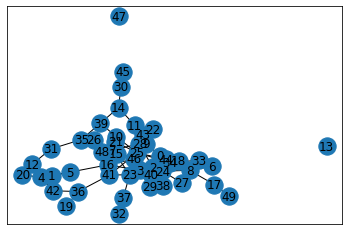

In [11]:
col_nodes = 50

def random_graf(p):
    edges = []
    for i in range(col_nodes):
        for j in range(i,col_nodes):
            if np.random.rand() < p and i!=j:
                edges.append([i,j])
            else:
                edges.append([i,i])
    g = networkx.Graph()
    g.add_edges_from(edges)               
    networkx.drawing.nx_pylab.draw_networkx(g, color='blue')

# random_graf(0.5 * 1/col_nodes)
#random_graf(1/col_nodes)
random_graf((p + np.log(col_nodes)/(col_nodes -1 )) / 3)
#random_graf(1.5 * np.log(col_nodes)/(col_nodes -1 ))


# Коэффициент кластеризации сети

![alt text](https://pidruchniki.com/imag/inform/snar_msls/image014.jpg)

где Ci=2*ei/ki(ki-1) 

ei - число ребер между всеми соседними вершинами,

ki - количесвто смежных вершин.